In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
# Define dataset paths
dataset_path =  r"C:\Users\35389\Desktop\Project Folder Team\plant village dataset\plantvillage dataset\color"  # Update with your dataset path

# Image data generator
train_datagen = ImageDataGenerator(
    rescale=1.0/255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-validation split
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [5]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


c:\Users\35389\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\35389\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1340s 983ms/step - accuracy: 0.4909 - loss: 1.8803 - val_accuracy: 0.8252 - val_loss: 0.5588
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2309s 2s/step - accuracy: 0.7894 - loss: 0.6760 - val_accuracy: 0.8734 - val_loss: 0.4033
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1269s 934ms/step - accuracy: 0.8438 - loss: 0.4949 - val_accuracy: 0.8846 - val_loss: 0.3566
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 692s 509ms/step - accuracy: 0.8752 - loss: 0.3958 - val_accuracy: 0.9119 - val_loss: 0.2700
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 775s 571ms/step - accuracy: 0.8925 - loss: 0.3350 - val_accuracy: 0.9208 - val_loss: 0.2338
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 789s 581ms/step - accuracy: 0.9053 - loss: 0.2940 - val_accuracy: 0.9326 - val_loss: 0.1987
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 858s 632ms/step - accuracy: 0.9177 - loss: 0.2567 - val_accuracy: 0.9416 - val_loss: 0.1900
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 925s 681ms/step - ac

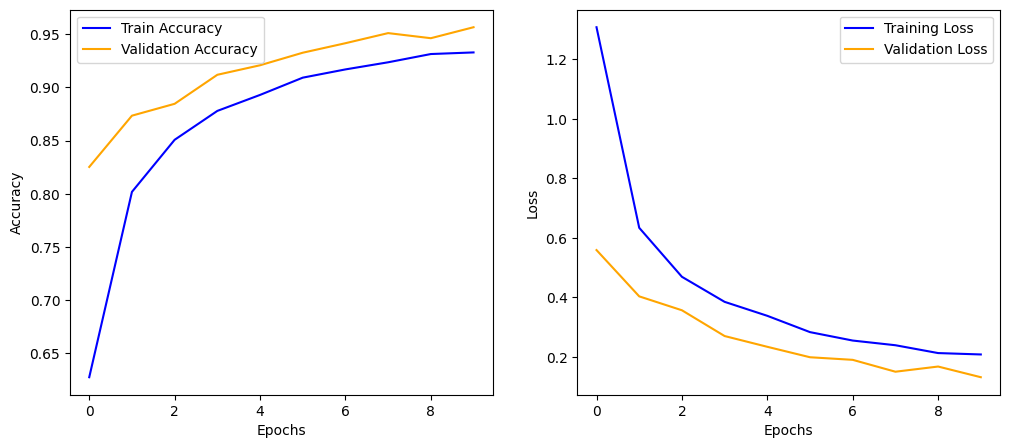

Model training completed and saved as plant_disease_model.keras


In [6]:
# Save the trained model
model.save("plant_disease_model.keras")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color = 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("Model training completed and saved as plant_disease_model.keras")

In [7]:
# Evaluate the model
eval_result = model.evaluate(val_generator)
print(f"Model Evaluation - Loss: {eval_result[0]}, Accuracy: {eval_result[1]}")


340/340 ━━━━━━━━━━━━━━━━━━━━ 62s 182ms/step - accuracy: 0.9550 - loss: 0.1388
Model Evaluation - Loss: 0.1331038475036621, Accuracy: 0.9582449793815613


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
# Load model
loaded_model = tf.keras.models.load_model('plant_disease_model.keras')

loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,874,932 (148.30 MB)

 Trainable params: 12,958,310 (49.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,916,622 (98.86 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The plant disease is: Tomato___Late_blight


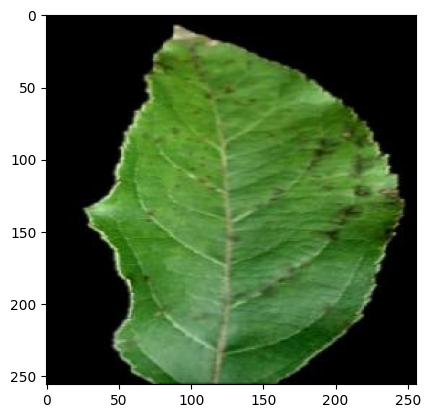

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
img_path = r"C:\Users\35389\Desktop\Project Coding File\model\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_final_masked.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image
img_array = img_array / 255.0

# Predict the class
prediction = loaded_model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)



# Get the class label
class_labels = list(train_generator.class_indices.keys())

predicted_class_label = class_labels[predicted_class[0]]
# result = loaded_model.evaluate(predicted_class_label)
# loss, accuracy = result[0], result[1]

print(f"The plant disease is: {predicted_class_label}")


plt.imshow(plt.imread(img_path))
plt.show()


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\35389\Desktop\Project Folder Team\plant village dataset\plantvillage dataset\color",  # Replace with the actual path
    target_size=(128, 128),  # Same as model input size
    batch_size=32,
    class_mode='categorical',  # Change to 'binary' for binary classification
    shuffle=False  # Important: No shuffling for evaluation
)

print(f"Total test samples: {test_generator.samples}")

Found 54305 images belonging to 38 classes.
Total test samples: 54305


In [7]:
loaded_model = tf.keras.models.load_model(r"C:\Users\35389\Desktop\Project Coding File\CNN\plant_disease_model.keras")

In [88]:
result = loaded_model.evaluate(test_generator)
loss, accuracy = result[0], result[1]

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1698/1698 ━━━━━━━━━━━━━━━━━━━━ 201s 118ms/step - accuracy: 0.9734 - loss: 0.0856
Test Loss: 0.0913
Test Accuracy: 0.9703


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[10]
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

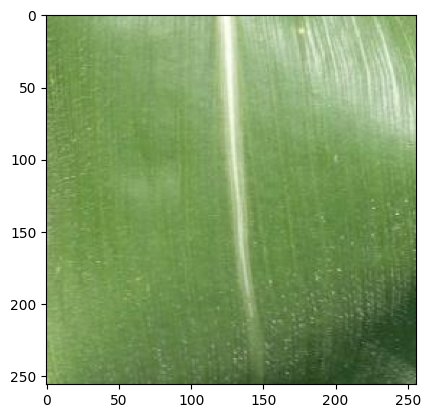

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
img_path = r"C:\Users\35389\Desktop\Project Coding File\model\0a2dec45-729b-4825-b814-a73d14e8c7fe___R.S_HL 8211 copy_final_masked.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image
img_array = img_array / 255.0

# Predict the class
prediction = loaded_model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(predicted_class)



# Get the class label
class_labels = list(train_generator.class_indices.keys())
print(class_labels)



plt.imshow(plt.imread(img_path))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Expand to match batch size
    image = image / 255.0  # Normalize if needed
    prediction = model.predict(image)
    predicted_class_index = np.argmax(prediction) 
    confidence = np.max(prediction) * 100  
    return class_labels[predicted_class_index], round(confidence, 2)

plt.figure(figsize=(15, 15))

# Iterate correctly over test_generator
for images, labels in test_generator:
    for i in range(min(9, len(images))):  # Avoid index error if <9 images
        ax = plt.subplot(3, 3, i + 1)

        img = images[i]  # No need for .numpy()
        if img.shape[-1] == 1: 
            plt.imshow(img.squeeze(), cmap="gray")
        else:  # If RGB
            plt.imshow(img)

        predicted_class, confidence = predict(loaded_model, img)
        actual_class = class_labels[np.argmax(labels[i])]  # Get actual class

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# True classes
true_classes = test_generator.classes

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)


c:\Users\35389\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1698/1698 ━━━━━━━━━━━━━━━━━━━━ 209s 123ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       630
                                 Apple___Black_rot       0.91      1.00      0.95       621
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       275
                                   Apple___healthy       0.86      0.99      0.92      1645
                               Blueberry___healthy       0.99      0.99      0.99      1502
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98      1052
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       854
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.94      0.91       513
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00      1192
               Corn_(maize)___No